In [110]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

transform = transforms.Compose(
    [transforms.Resize(64),  # Изменяем размер изображений до 64x64
     transforms.CenterCrop(64),  # Обрезаем изображение до 64x64
     transforms.RandomHorizontalFlip(),  # Случайное горизонтальное переворачивание
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# dataset = ImageFolder(root='open_images_classification', transform=transform)
dataset = ImageFolder(root='open_images_house', transform=transform)

train_size = int(0.8 * len(dataset))
val_size = int((len(dataset) - train_size)/2)
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
valLoader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

classes = dataset.classes

# Определение нейронной сети
class ConvNeuralNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(256 * 8 * 8, 512)  # Размер входа зависит от размера после conv/pool слоев
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)  # 10 выходных нейронов для многоклассовой классификации

    def forward(self, x):
        # print(f'Input: {x.shape}')
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # print(f'After conv1: {x.shape}')
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # print(f'After conv2: {x.shape}')
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        # print(f'After conv3: {x.shape}')
        x = x.view(-1, 256 * 8 * 8)
        # print(f'After view: {x.shape}')
        x = F.relu(self.fc1(x))
        # print(f'After fc1: {x.shape}')
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        # print(f'After fc2: {x.shape}')
        x = self.dropout(x)
        x = self.fc3(x)  # Используем линейный слой для многоклассовой классификации
        # print(f'Output: {x.shape}')
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"

# set the model to device
model = ConvNeuralNet(len(classes)).to(device)

# set loss function
loss_func = nn.CrossEntropyLoss()

# set learning rate 
lerning_rate = 0.010

# set optimizer as SGD
optimizer = torch.optim.SGD(
    model.parameters(), lr=lerning_rate
) 


Обучение завершен  ======   
Epoch [1/10], Loss: 0.0894, Val-loss: 1.1477, Val-acc: 64.8%
Завершена валидация  ======   
Обучение завершен  ======   
Epoch [2/10], Loss: 0.0842, Val-loss: 1.2147, Val-acc: 71.1%
Завершена валидация  ======   
Обучение завершен  ======   
Epoch [3/10], Loss: 0.0694, Val-loss: 1.3934, Val-acc: 66.4%
Завершена валидация  ======   
Обучение завершен  ======   
Epoch [4/10], Loss: 0.7302, Val-loss: 1.4966, Val-acc: 55.5%
Завершена валидация  ======   
Обучение завершен  ======   
Epoch [5/10], Loss: 0.4212, Val-loss: 1.4340, Val-acc: 69.5%
Завершена валидация  ======   
Обучение завершен  ======   
Epoch [6/10], Loss: 0.1003, Val-loss: 1.4156, Val-acc: 62.5%
Завершена валидация  ======   
Обучение завершен  ======   
Epoch [7/10], Loss: 0.0182, Val-loss: 1.5687, Val-acc: 61.7%
Завершена валидация  ======   
Обучение завершен  ======   
Epoch [8/10], Loss: 0.0532, Val-loss: 1.7177, Val-acc: 62.5%
Завершена валидация  ======   
Обучение завершен  ======   
Epo

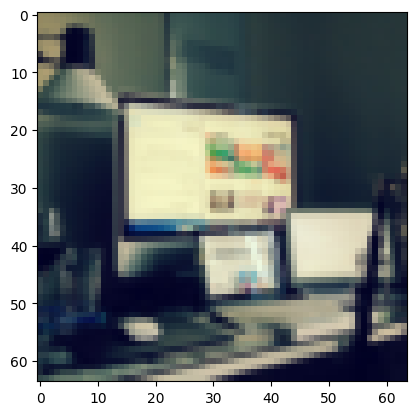

Истинный класс: Other, Предсказанный класс: Other


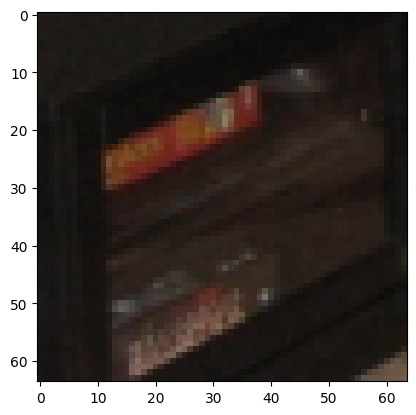

Истинный класс: Other, Предсказанный класс: Other


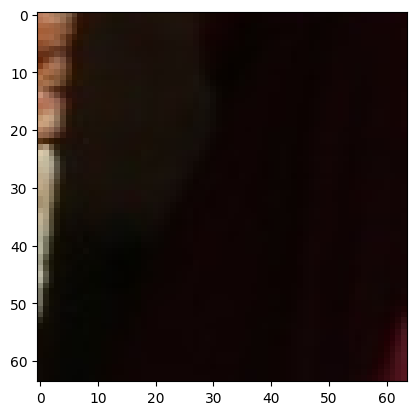

Истинный класс: Other, Предсказанный класс: Other


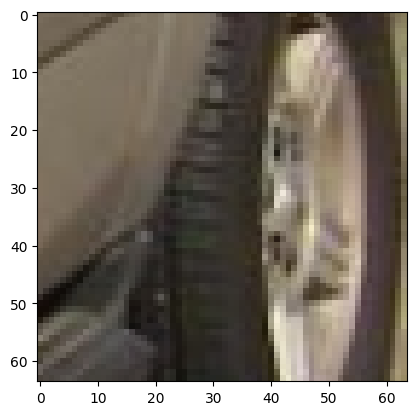

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 8
correct ---> 8
Истинный класс: Other, Предсказанный класс: Other


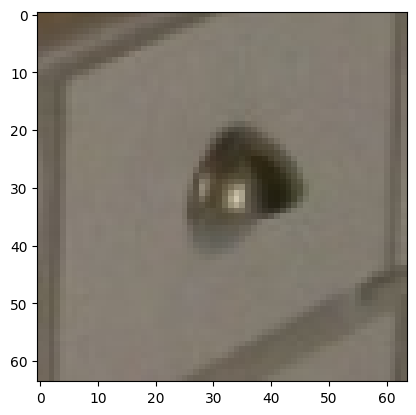

Истинный класс: Other, Предсказанный класс: Other


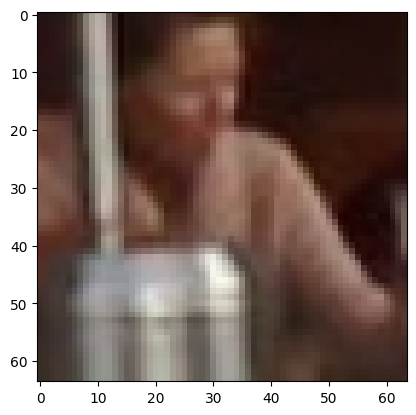

Истинный класс: Other, Предсказанный класс: Other


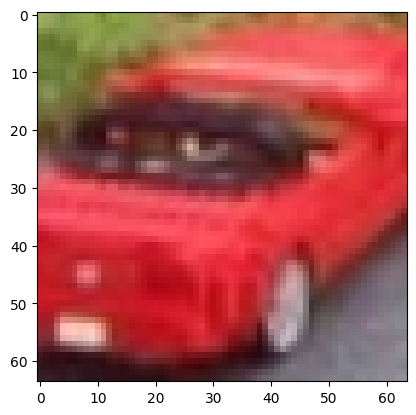

Истинный класс: Other, Предсказанный класс: Other


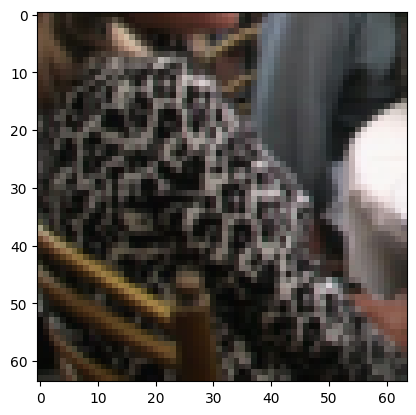

labels ---> tensor([ 9, 10,  9,  9])
predicted ---> tensor([ 9, 10,  9,  9])
total ---> 12
correct ---> 12
Истинный класс: Other, Предсказанный класс: Other


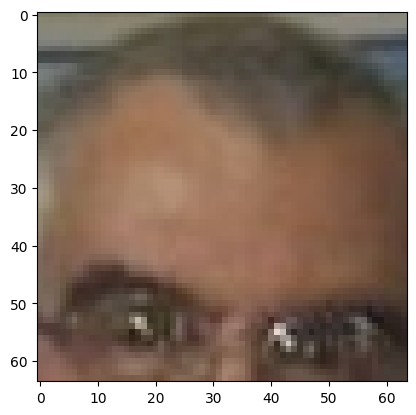

Истинный класс: Window, Предсказанный класс: Window


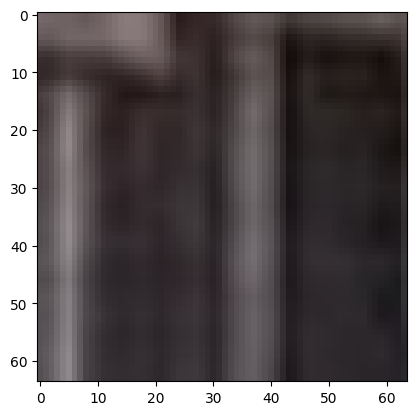

Истинный класс: Other, Предсказанный класс: Other


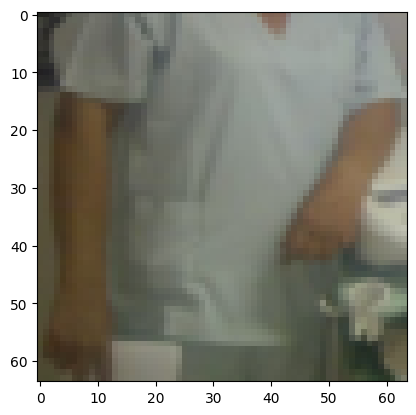

Истинный класс: Other, Предсказанный класс: Other


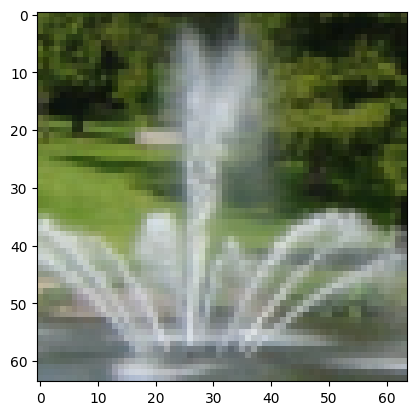

labels ---> tensor([ 6,  9,  9, 10])
predicted ---> tensor([ 6,  0,  9, 10])
total ---> 16
correct ---> 15
Истинный класс: House, Предсказанный класс: House


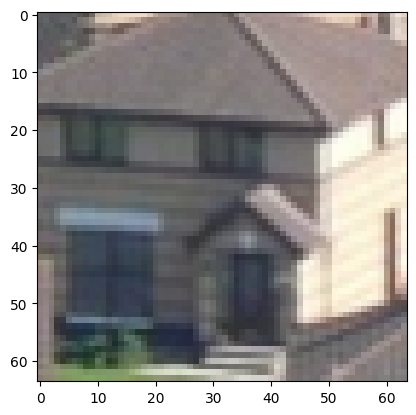

Истинный класс: Other, Предсказанный класс: Building


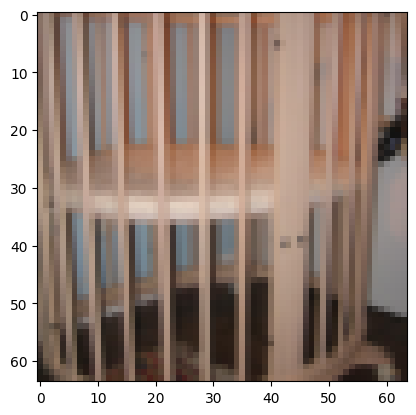

Истинный класс: Other, Предсказанный класс: Other


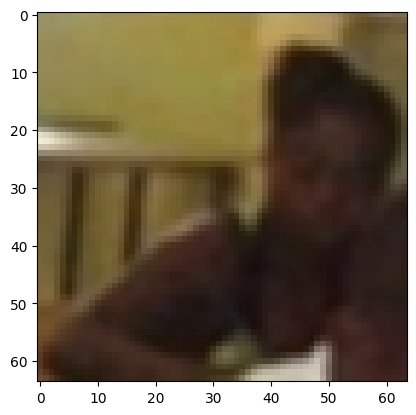

Истинный класс: Window, Предсказанный класс: Window


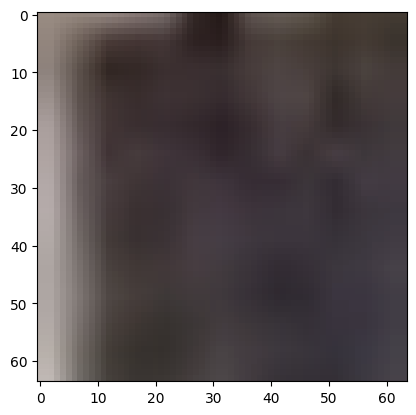

labels ---> tensor([ 9,  6, 10,  6])
predicted ---> tensor([ 9,  6, 10,  6])
total ---> 20
correct ---> 19
Истинный класс: Other, Предсказанный класс: Other


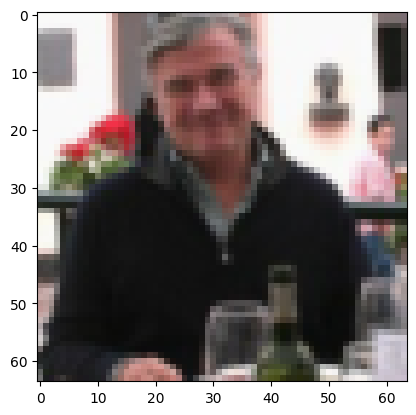

Истинный класс: House, Предсказанный класс: House


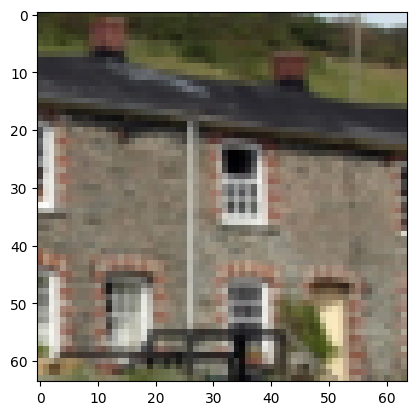

Истинный класс: Window, Предсказанный класс: Window


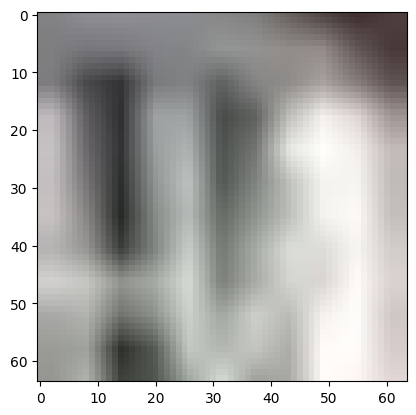

Истинный класс: House, Предсказанный класс: House


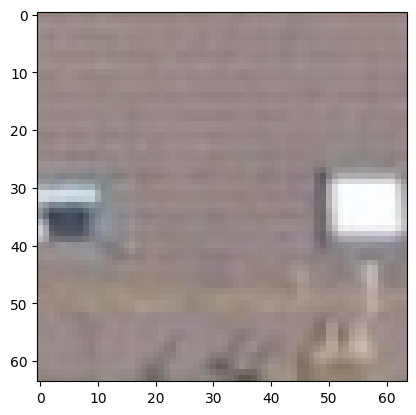

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 24
correct ---> 23
Истинный класс: Other, Предсказанный класс: Other


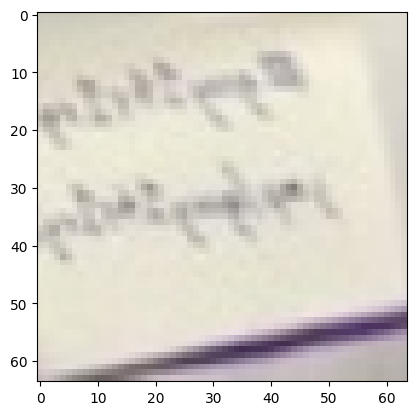

Истинный класс: Other, Предсказанный класс: Other


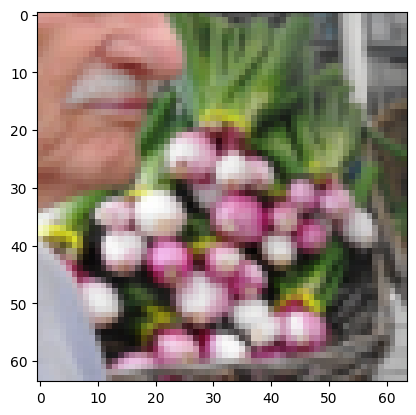

Истинный класс: Other, Предсказанный класс: Other


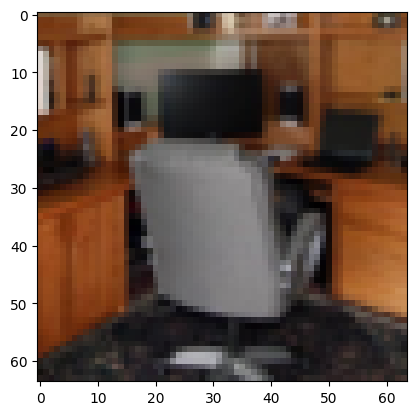

Истинный класс: Other, Предсказанный класс: Other


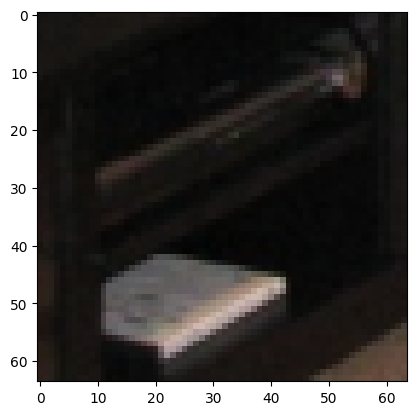

labels ---> tensor([9, 2, 1, 0])
predicted ---> tensor([6, 9, 8, 9])
total ---> 28
correct ---> 23
Истинный класс: Other, Предсказанный класс: House


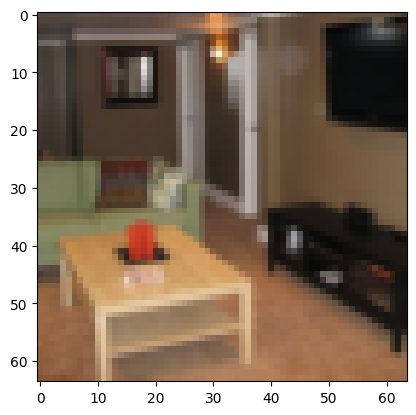

Истинный класс: Cupboard, Предсказанный класс: Other


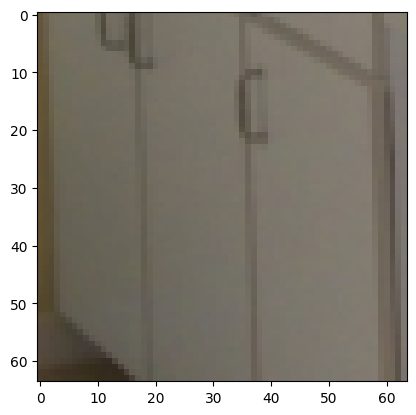

Истинный класс: Cabinetry, Предсказанный класс: Office supplies


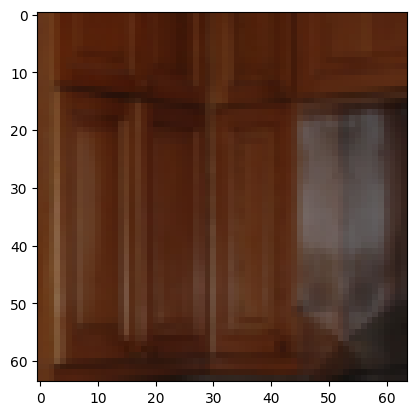

Истинный класс: Building, Предсказанный класс: Other


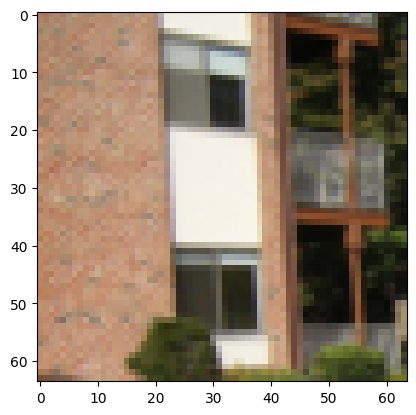

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 32
correct ---> 27
Истинный класс: Other, Предсказанный класс: Other


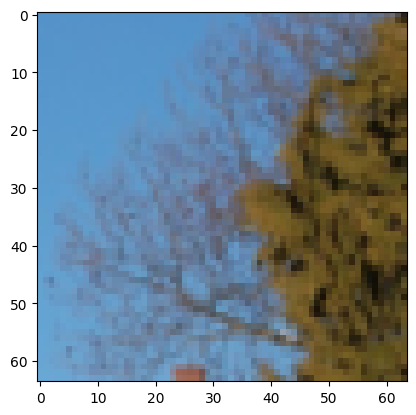

Истинный класс: Other, Предсказанный класс: Other


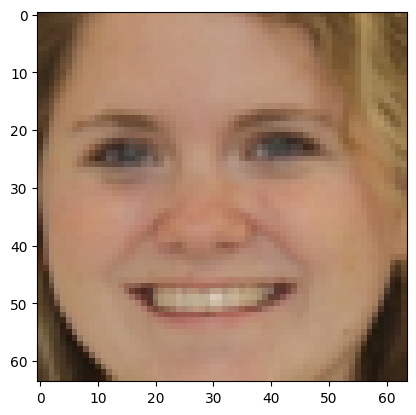

Истинный класс: Other, Предсказанный класс: Other


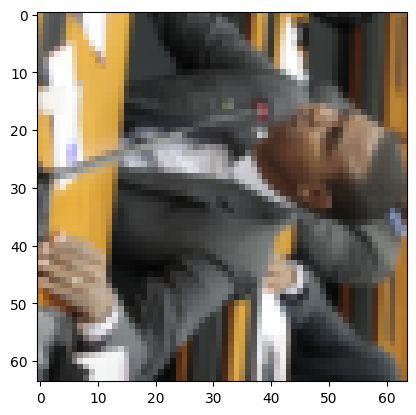

Истинный класс: Other, Предсказанный класс: Other


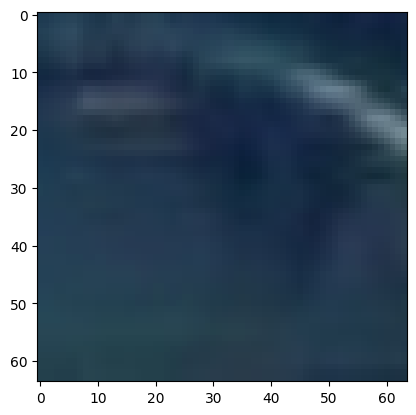

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([ 9,  9,  9, 10])
total ---> 36
correct ---> 30
Истинный класс: Other, Предсказанный класс: Other


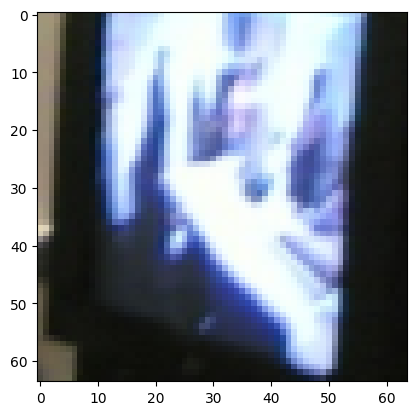

Истинный класс: Other, Предсказанный класс: Other


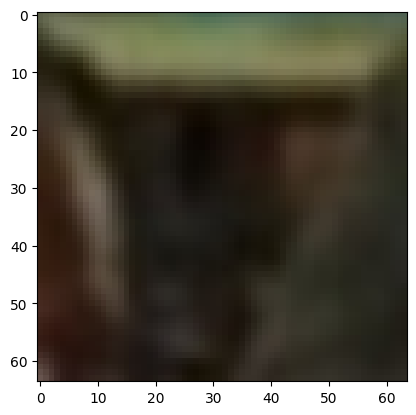

Истинный класс: Other, Предсказанный класс: Other


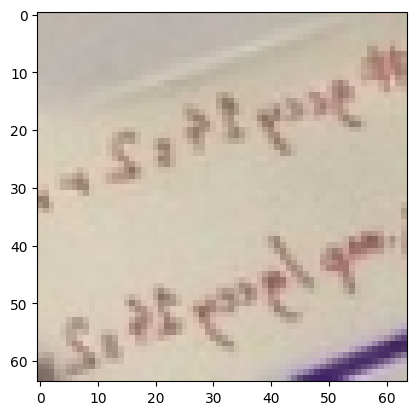

Истинный класс: Other, Предсказанный класс: Window


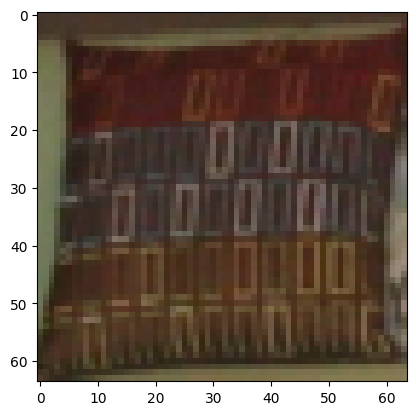

labels ---> tensor([0, 0, 9, 9])
predicted ---> tensor([6, 9, 6, 9])
total ---> 40
correct ---> 31
Истинный класс: Building, Предсказанный класс: House


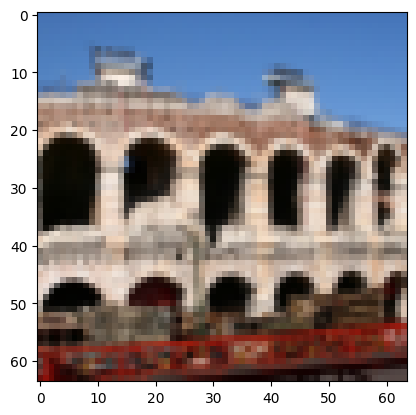

Истинный класс: Building, Предсказанный класс: Other


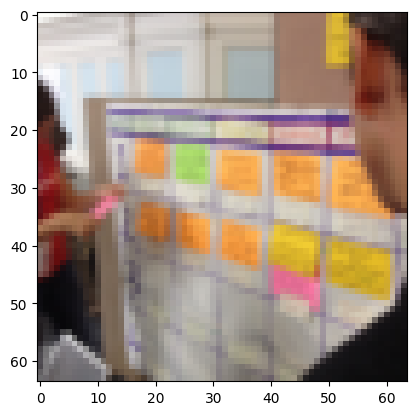

Истинный класс: Other, Предсказанный класс: House


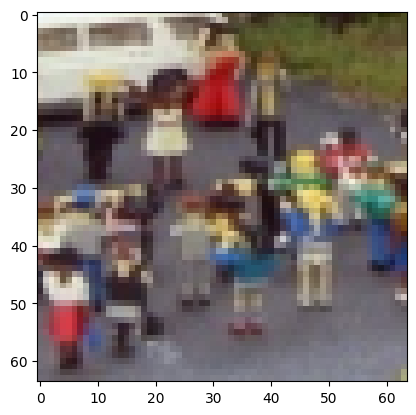

Истинный класс: Other, Предсказанный класс: Other


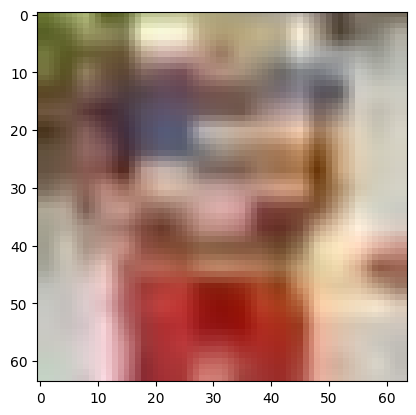

labels ---> tensor([ 9,  9, 10,  9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 44
correct ---> 34
Истинный класс: Other, Предсказанный класс: Other


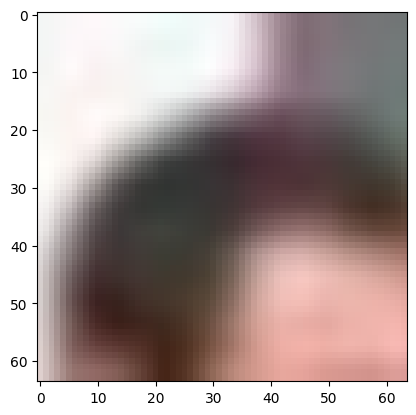

Истинный класс: Other, Предсказанный класс: Other


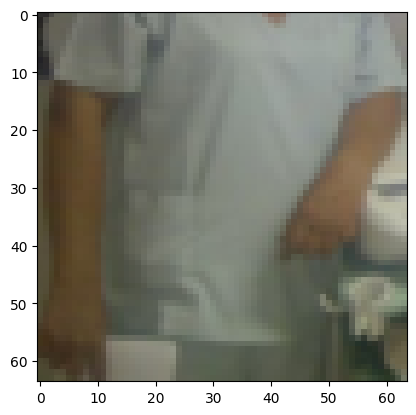

Истинный класс: Window, Предсказанный класс: Other


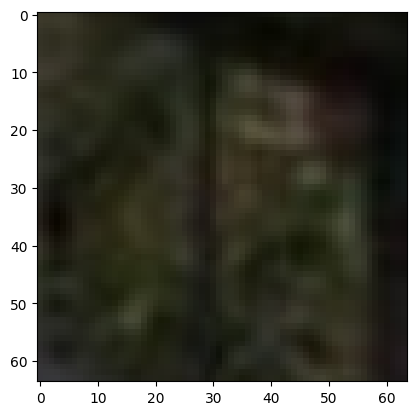

Истинный класс: Other, Предсказанный класс: Other


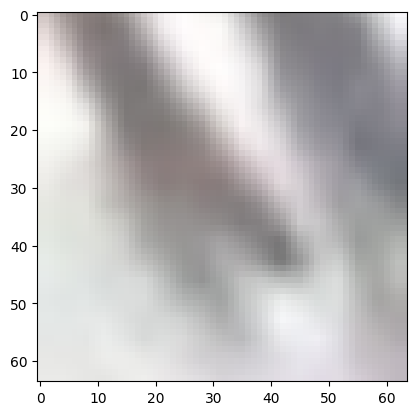

labels ---> tensor([9, 9, 9, 0])
predicted ---> tensor([10,  9,  0,  9])
total ---> 48
correct ---> 35
Истинный класс: Other, Предсказанный класс: Window


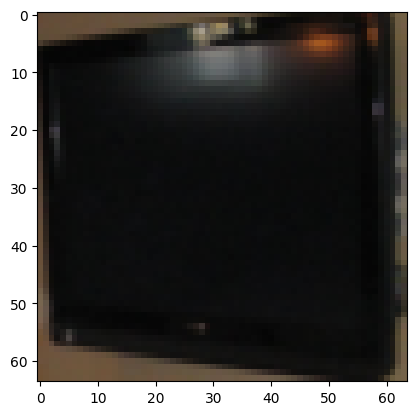

Истинный класс: Other, Предсказанный класс: Other


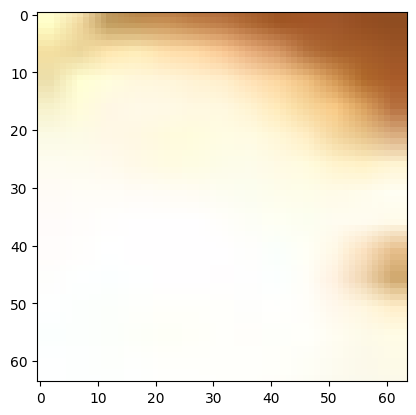

Истинный класс: Other, Предсказанный класс: Building


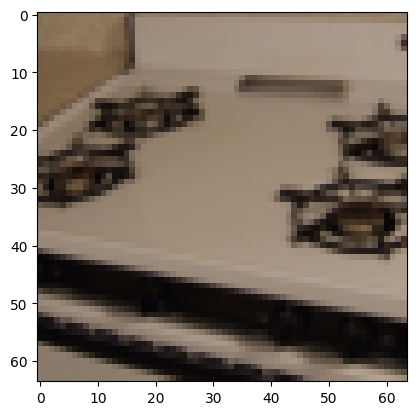

Истинный класс: Building, Предсказанный класс: Other


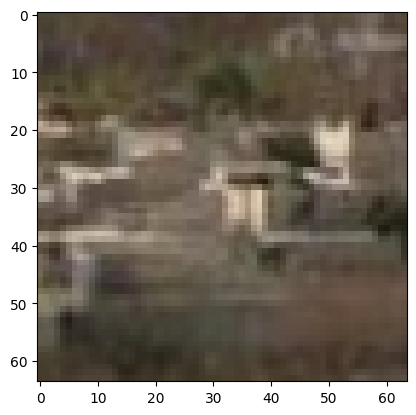

labels ---> tensor([9, 9, 9, 0])
predicted ---> tensor([8, 9, 9, 9])
total ---> 52
correct ---> 37
Истинный класс: Other, Предсказанный класс: Office supplies


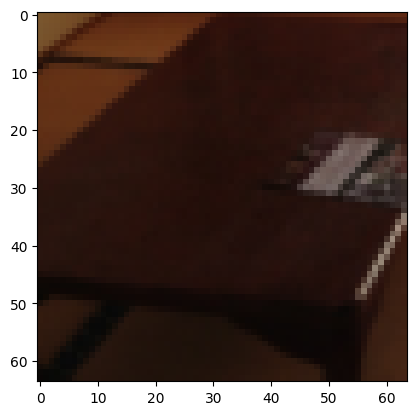

Истинный класс: Other, Предсказанный класс: Other


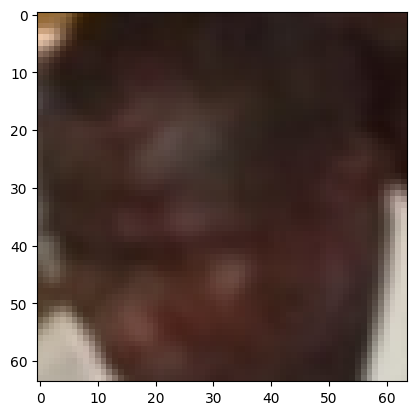

Истинный класс: Other, Предсказанный класс: Other


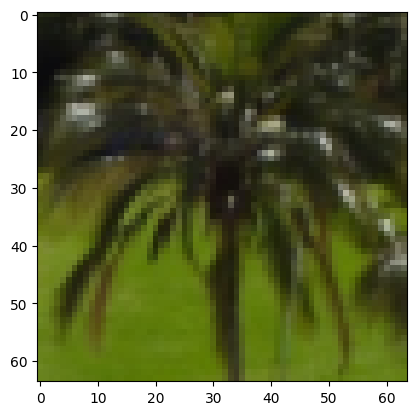

Истинный класс: Building, Предсказанный класс: Other


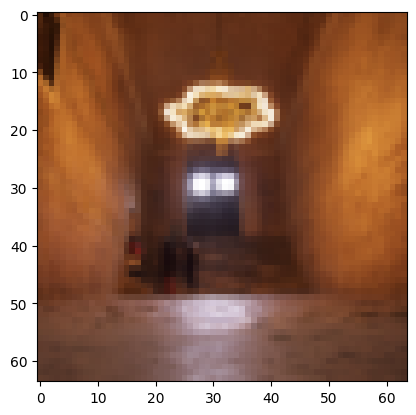

labels ---> tensor([ 9, 10,  9,  2])
predicted ---> tensor([ 9, 10,  9,  9])
total ---> 56
correct ---> 40
Истинный класс: Other, Предсказанный класс: Other


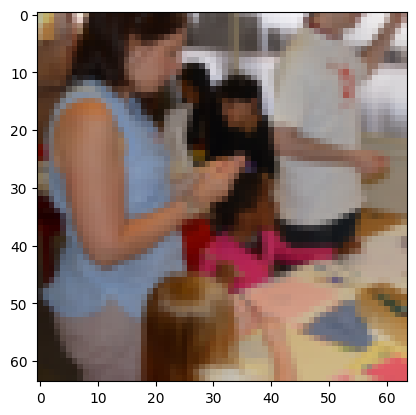

Истинный класс: Window, Предсказанный класс: Window


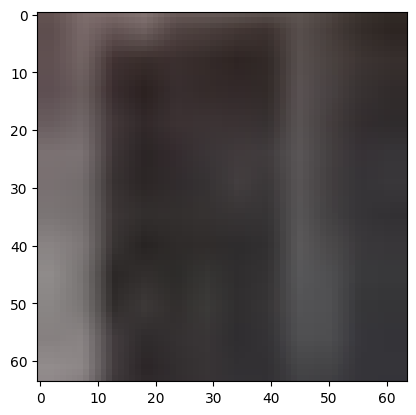

Истинный класс: Other, Предсказанный класс: Other


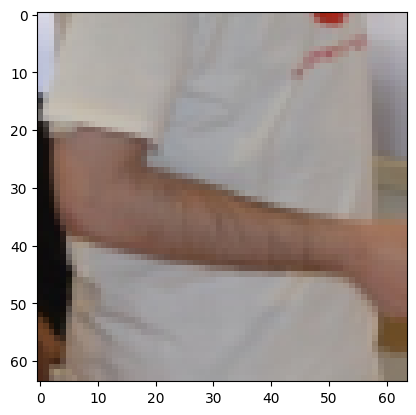

Истинный класс: Cupboard, Предсказанный класс: Other


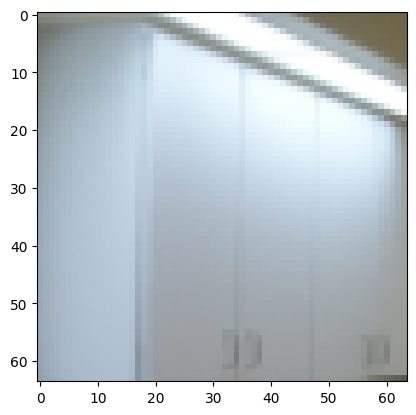

labels ---> tensor([9, 9, 9, 7])
predicted ---> tensor([9, 9, 9, 9])
total ---> 60
correct ---> 43
Истинный класс: Other, Предсказанный класс: Other


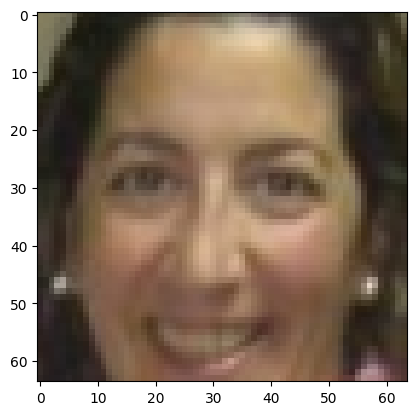

Истинный класс: Other, Предсказанный класс: Other


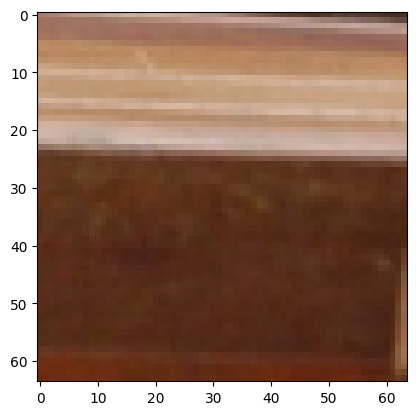

Истинный класс: Other, Предсказанный класс: Other


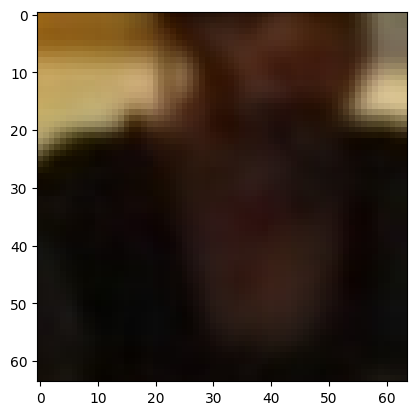

Истинный класс: Kitchen appliance, Предсказанный класс: Other


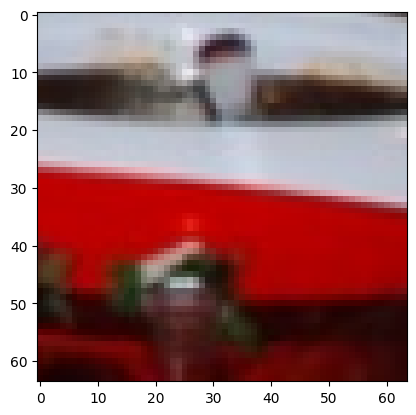

labels ---> tensor([5, 9, 5, 9])
predicted ---> tensor([6, 9, 5, 9])
total ---> 64
correct ---> 46
Истинный класс: Furniture, Предсказанный класс: House


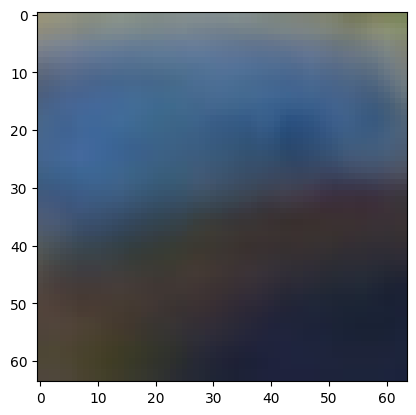

Истинный класс: Other, Предсказанный класс: Other


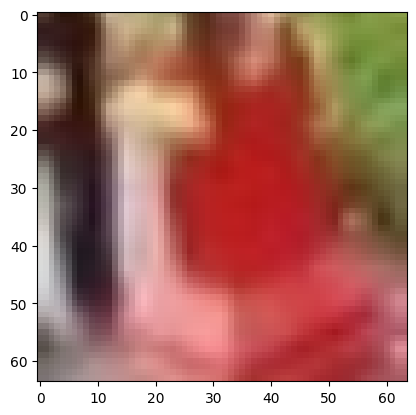

Истинный класс: Furniture, Предсказанный класс: Furniture


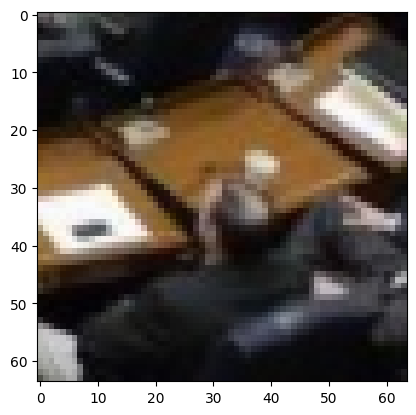

Истинный класс: Other, Предсказанный класс: Other


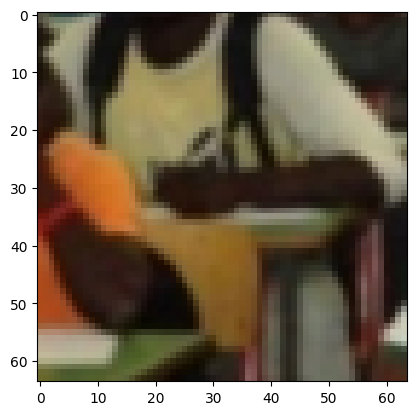

labels ---> tensor([ 9,  9, 10,  9])
predicted ---> tensor([ 9,  9, 10,  9])
total ---> 68
correct ---> 50
Истинный класс: Other, Предсказанный класс: Other


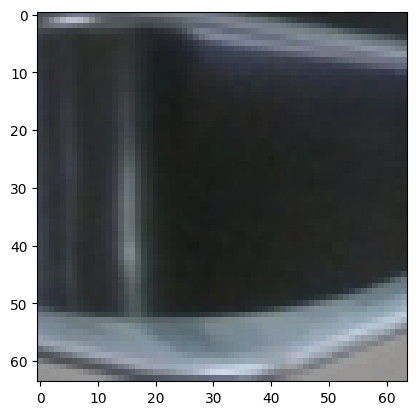

Истинный класс: Other, Предсказанный класс: Other


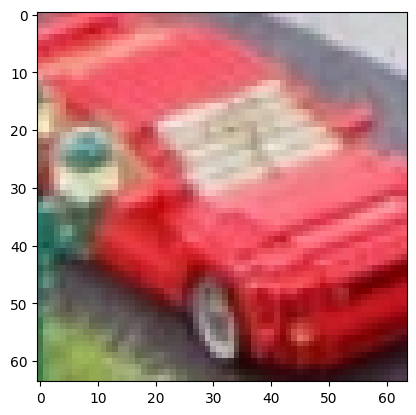

Истинный класс: Window, Предсказанный класс: Window


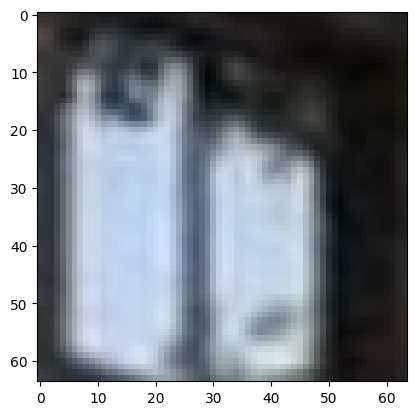

Истинный класс: Other, Предсказанный класс: Other


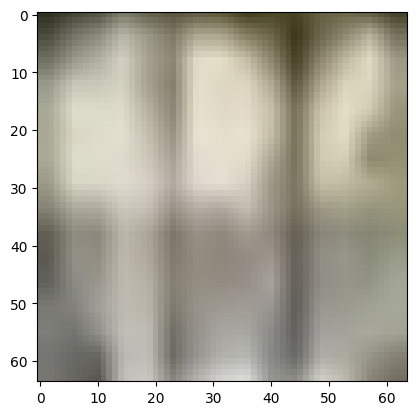

labels ---> tensor([ 9,  9,  0, 10])
predicted ---> tensor([9, 6, 6, 9])
total ---> 72
correct ---> 51
Истинный класс: Other, Предсказанный класс: Other


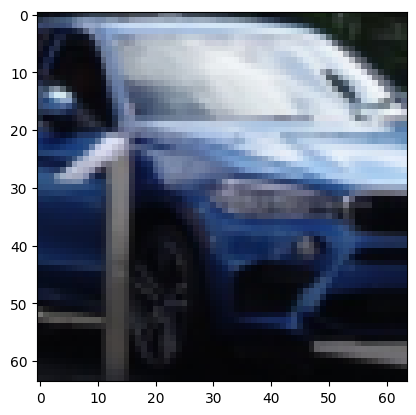

Истинный класс: Other, Предсказанный класс: House


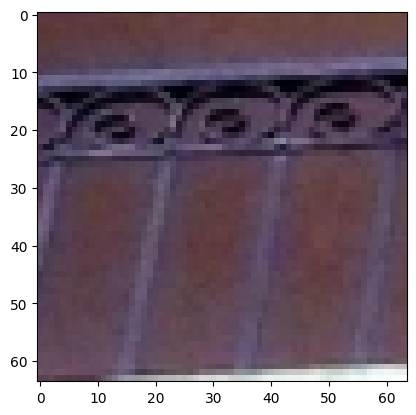

Истинный класс: Building, Предсказанный класс: House


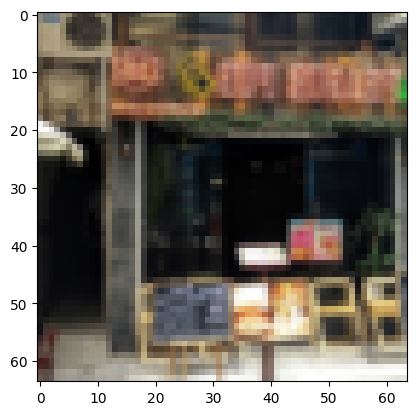

Истинный класс: Window, Предсказанный класс: Other


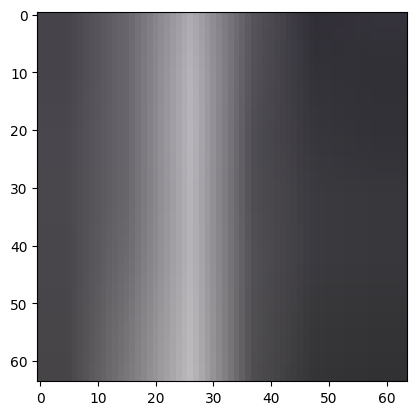

labels ---> tensor([ 9,  9,  6, 10])
predicted ---> tensor([ 9,  9,  6, 10])
total ---> 76
correct ---> 55
Истинный класс: Other, Предсказанный класс: Other


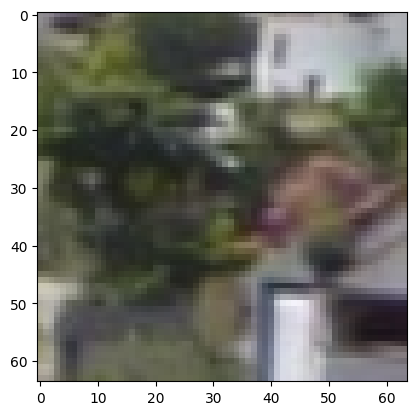

Истинный класс: Other, Предсказанный класс: Other


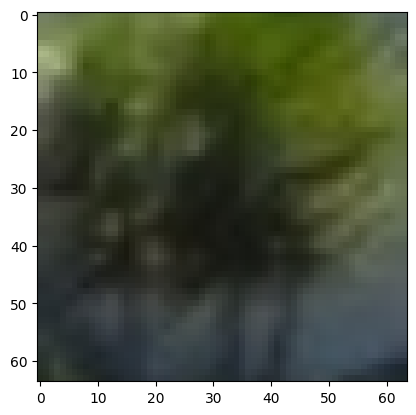

Истинный класс: House, Предсказанный класс: House


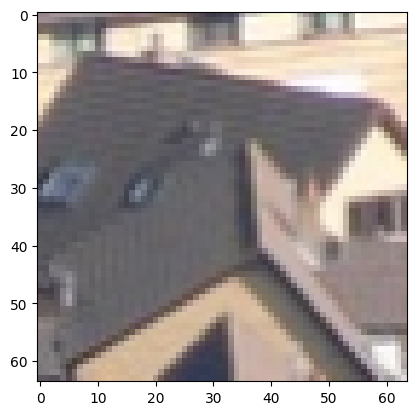

Истинный класс: Window, Предсказанный класс: Window


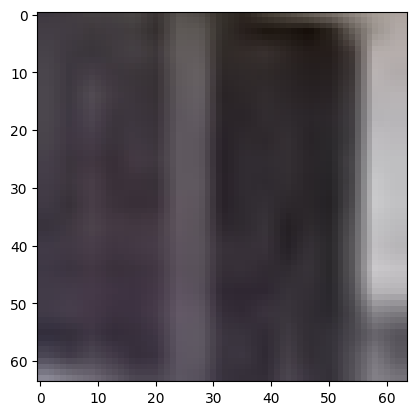

labels ---> tensor([ 9,  6,  9, 10])
predicted ---> tensor([9, 6, 9, 9])
total ---> 80
correct ---> 58
Истинный класс: Other, Предсказанный класс: Other


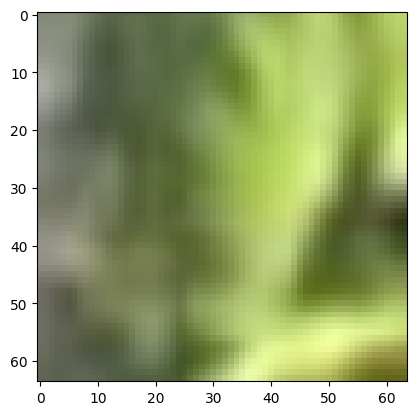

Истинный класс: House, Предсказанный класс: House


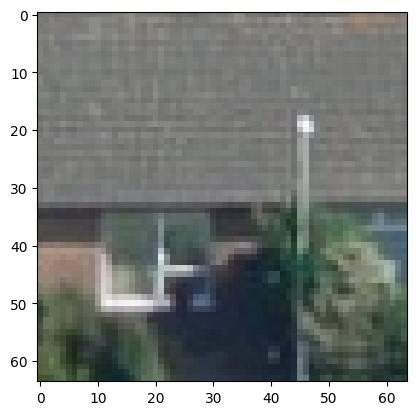

Истинный класс: Other, Предсказанный класс: Other


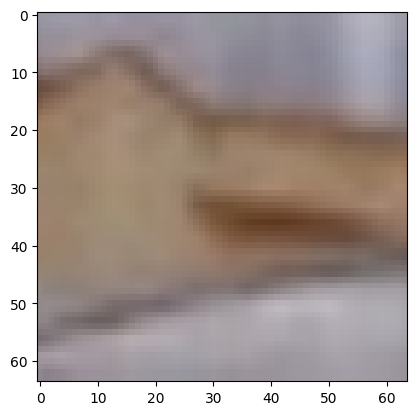

Истинный класс: Window, Предсказанный класс: Other


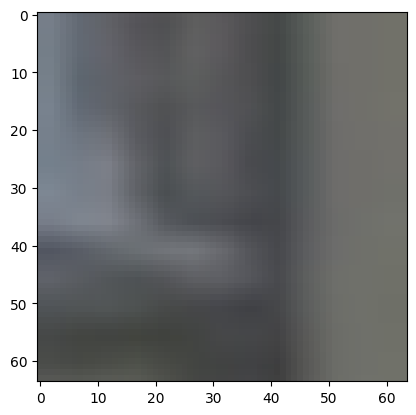

labels ---> tensor([5, 0, 9, 9])
predicted ---> tensor([9, 0, 9, 9])
total ---> 84
correct ---> 61
Истинный класс: Furniture, Предсказанный класс: Other


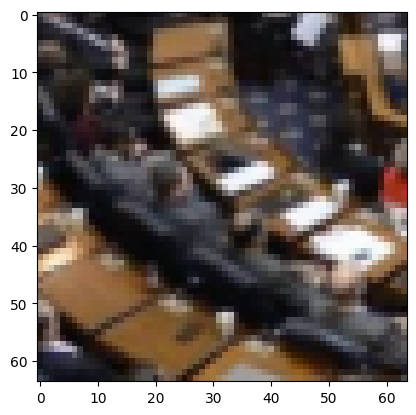

Истинный класс: Building, Предсказанный класс: Building


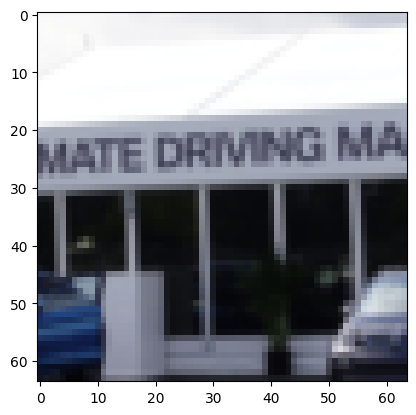

Истинный класс: Other, Предсказанный класс: Other


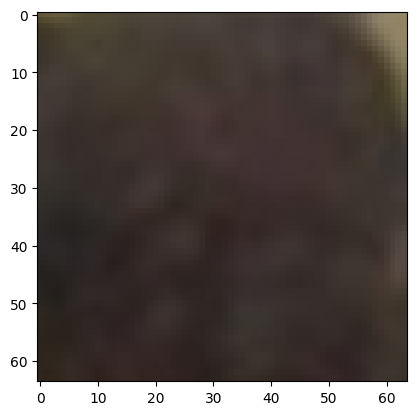

Истинный класс: Other, Предсказанный класс: Other


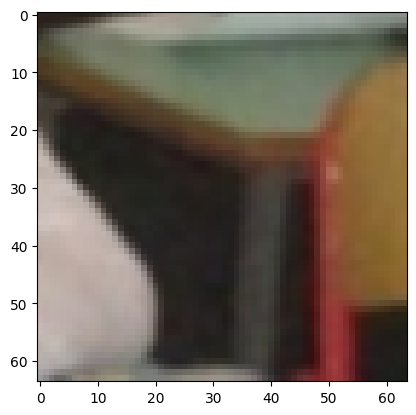

labels ---> tensor([9, 9, 5, 9])
predicted ---> tensor([9, 9, 5, 9])
total ---> 88
correct ---> 65
Истинный класс: Other, Предсказанный класс: Other


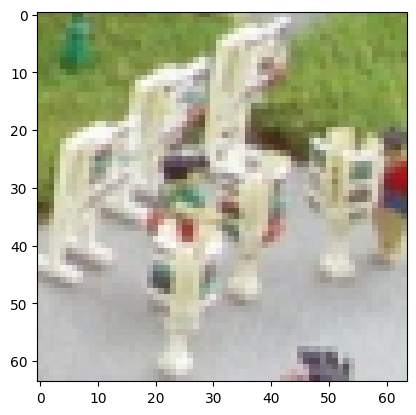

Истинный класс: Other, Предсказанный класс: Other


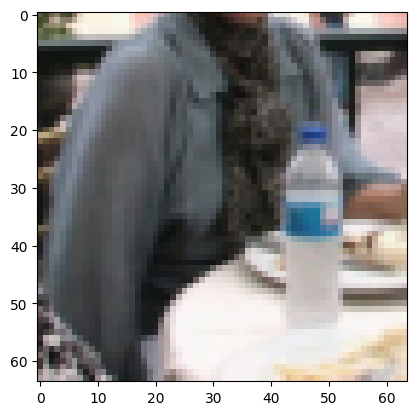

Истинный класс: Furniture, Предсказанный класс: Furniture


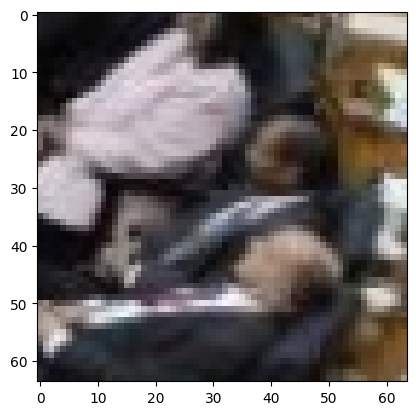

Истинный класс: Other, Предсказанный класс: Other


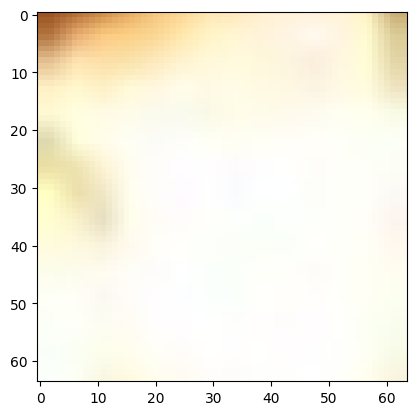

labels ---> tensor([9, 0, 9, 5])
predicted ---> tensor([9, 9, 9, 9])
total ---> 92
correct ---> 67
Истинный класс: Other, Предсказанный класс: Other


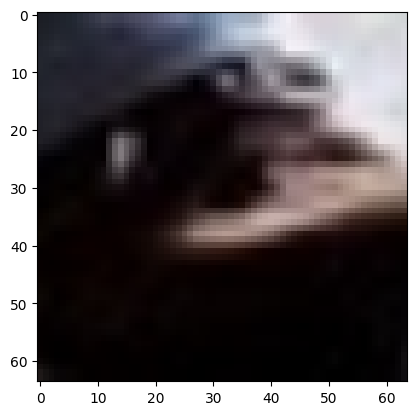

Истинный класс: Building, Предсказанный класс: Other


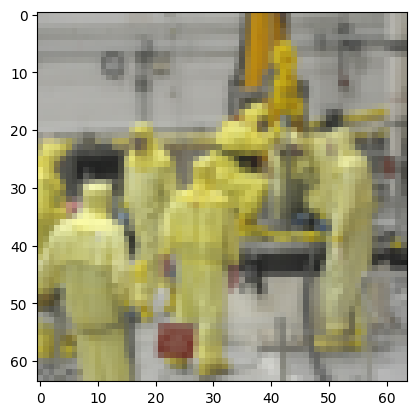

Истинный класс: Other, Предсказанный класс: Other


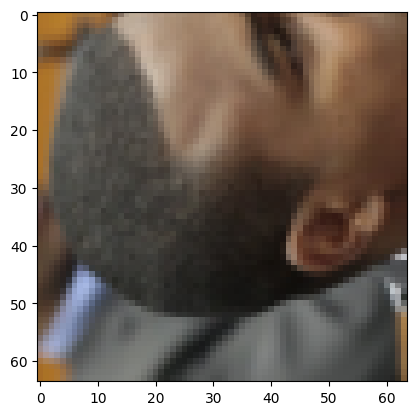

Истинный класс: Furniture, Предсказанный класс: Other


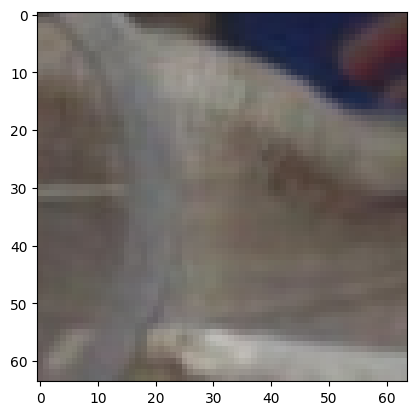

labels ---> tensor([ 0,  0,  5, 10])
predicted ---> tensor([9, 9, 9, 9])
total ---> 96
correct ---> 67
Истинный класс: Building, Предсказанный класс: Other


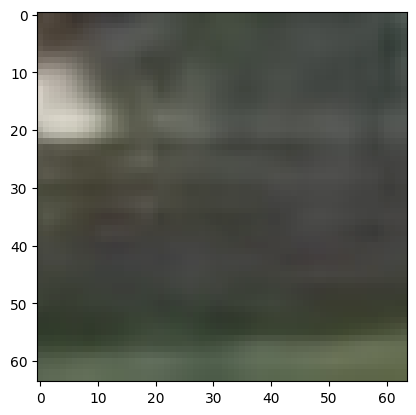

Истинный класс: Building, Предсказанный класс: Other


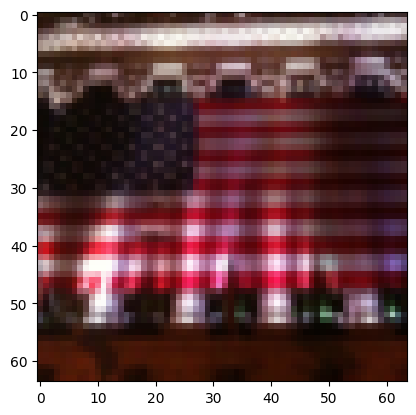

Истинный класс: Furniture, Предсказанный класс: Other


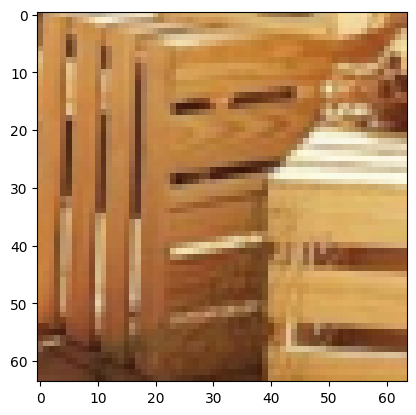

Истинный класс: Window, Предсказанный класс: Other


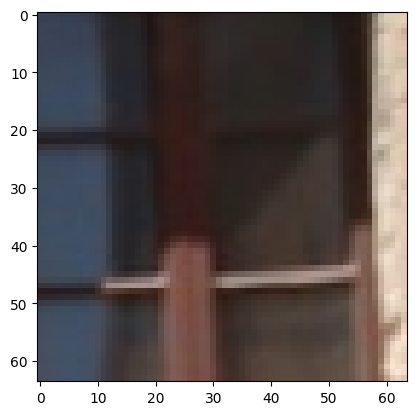

labels ---> tensor([9, 9, 0, 6])
predicted ---> tensor([9, 9, 9, 6])
total ---> 100
correct ---> 70
Истинный класс: Other, Предсказанный класс: Other


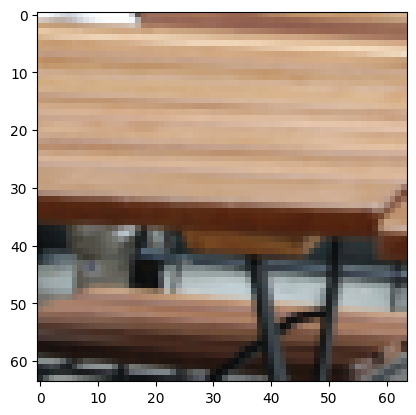

Истинный класс: Other, Предсказанный класс: Other


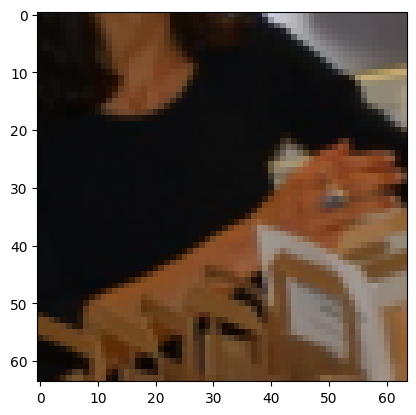

Истинный класс: Building, Предсказанный класс: Other


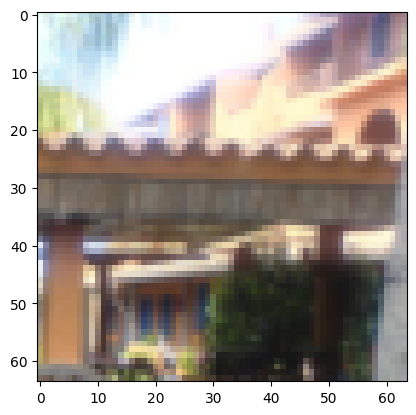

Истинный класс: House, Предсказанный класс: House


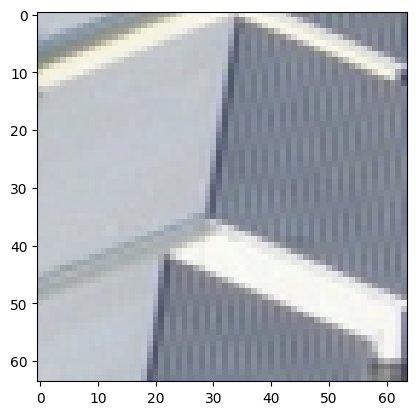

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 104
correct ---> 74
Истинный класс: Other, Предсказанный класс: Other


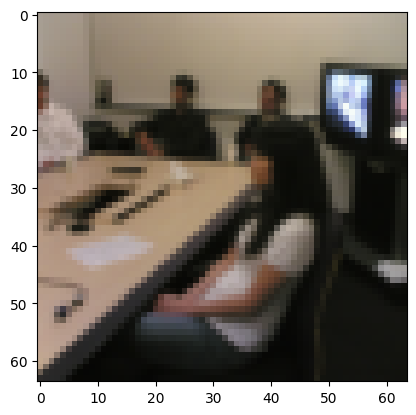

Истинный класс: Other, Предсказанный класс: Other


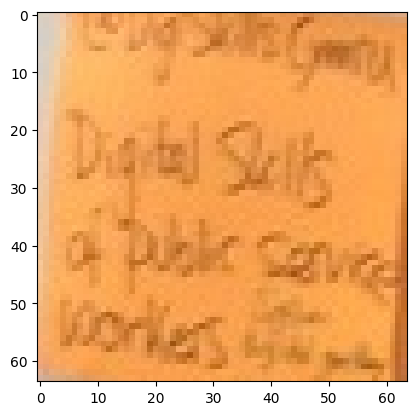

Истинный класс: Other, Предсказанный класс: Other


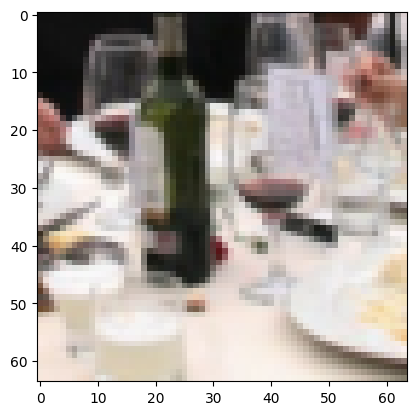

Истинный класс: Other, Предсказанный класс: Other


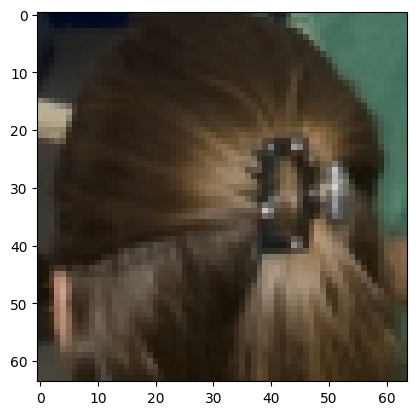

labels ---> tensor([9, 9, 9, 0])
predicted ---> tensor([9, 9, 9, 9])
total ---> 108
correct ---> 77
Истинный класс: Other, Предсказанный класс: Other


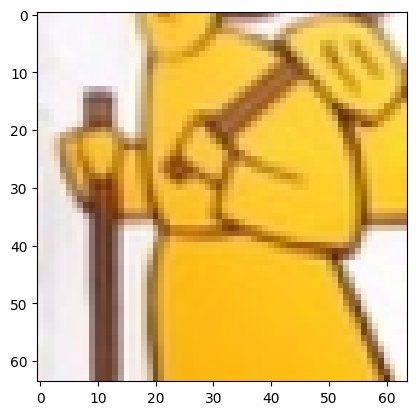

Истинный класс: Other, Предсказанный класс: Other


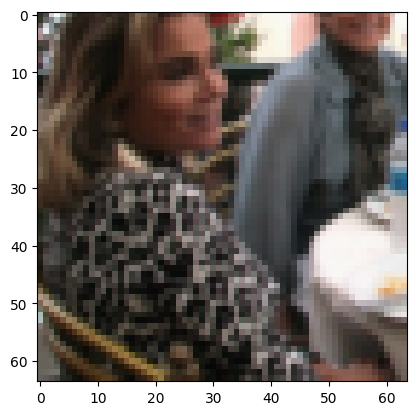

Истинный класс: Other, Предсказанный класс: Other


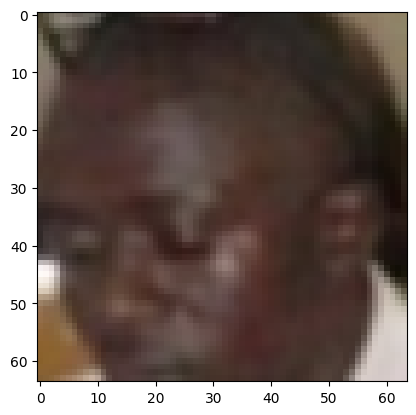

Истинный класс: Building, Предсказанный класс: Other


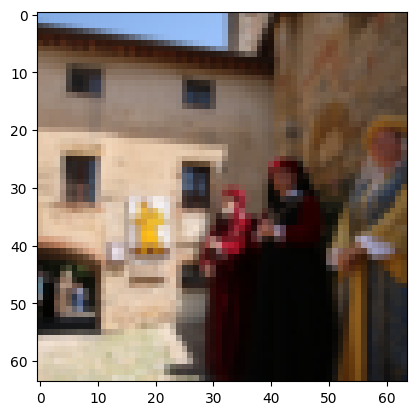

labels ---> tensor([9, 9, 6, 9])
predicted ---> tensor([9, 9, 6, 9])
total ---> 112
correct ---> 81
Истинный класс: Other, Предсказанный класс: Other


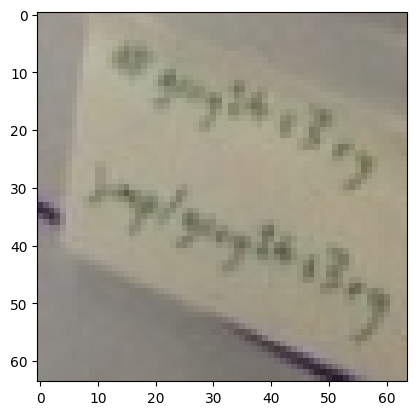

Истинный класс: Other, Предсказанный класс: Other


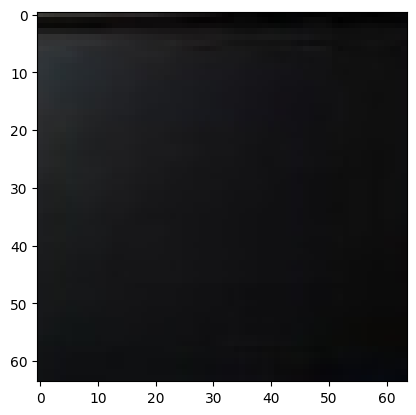

Истинный класс: House, Предсказанный класс: House


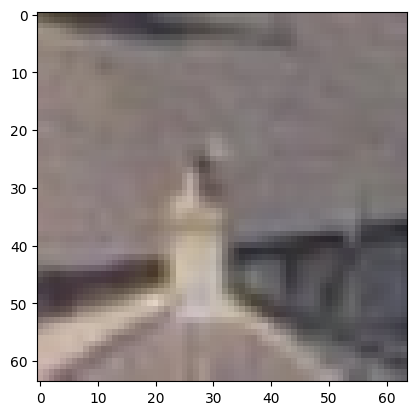

Истинный класс: Other, Предсказанный класс: Other


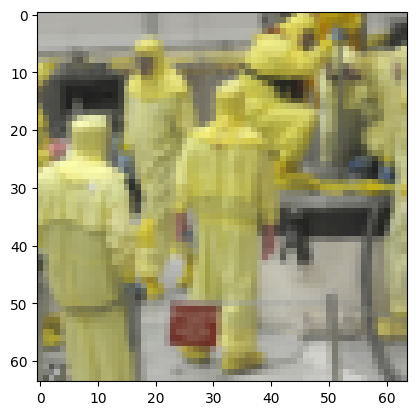

labels ---> tensor([0, 9, 9, 0])
predicted ---> tensor([9, 9, 9, 6])
total ---> 116
correct ---> 83
Истинный класс: Building, Предсказанный класс: Other


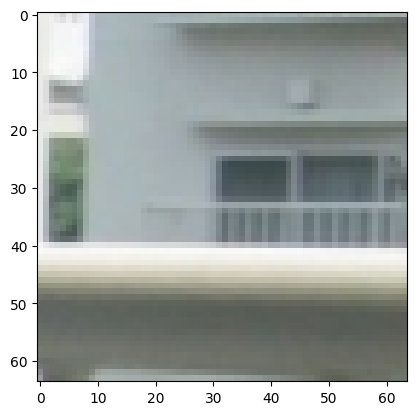

Истинный класс: Other, Предсказанный класс: Other


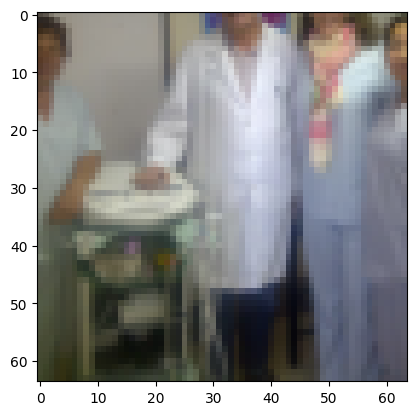

Истинный класс: Other, Предсказанный класс: Other


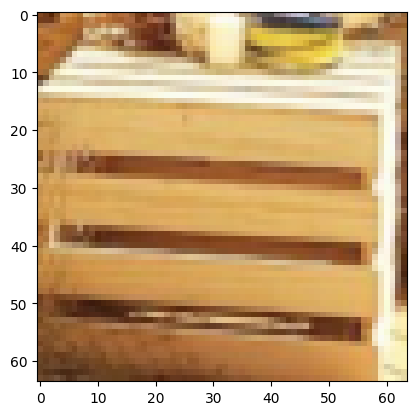

Истинный класс: Building, Предсказанный класс: House


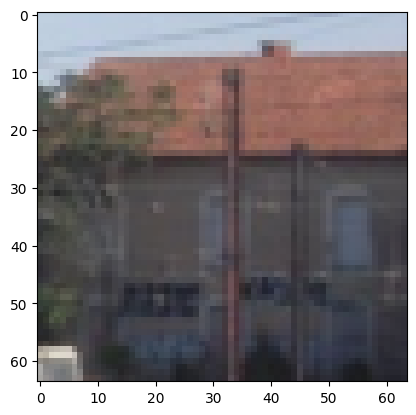

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 120
correct ---> 87
Истинный класс: Other, Предсказанный класс: Other


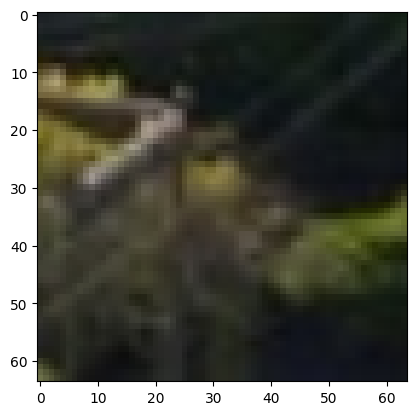

Истинный класс: Other, Предсказанный класс: Other


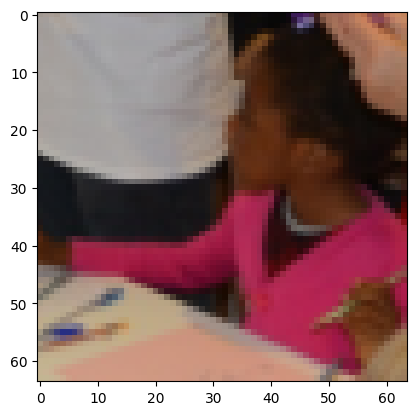

Истинный класс: Other, Предсказанный класс: Other


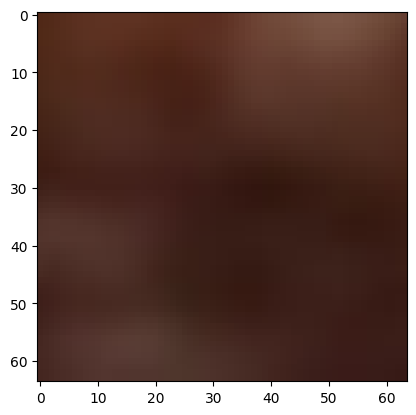

Истинный класс: Other, Предсказанный класс: Other


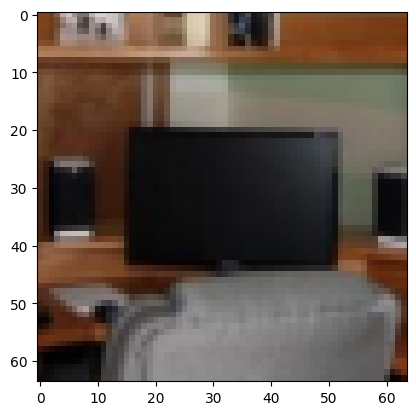

labels ---> tensor([9, 9, 9, 3])
predicted ---> tensor([9, 9, 9, 0])
total ---> 124
correct ---> 90
Истинный класс: Other, Предсказанный класс: Other


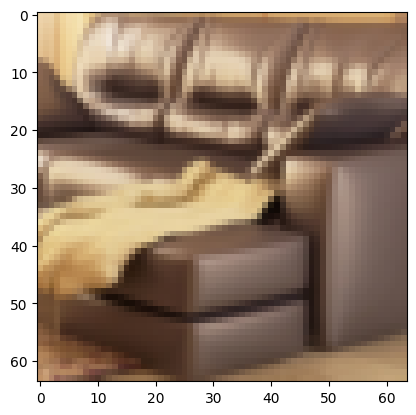

Истинный класс: Other, Предсказанный класс: Other


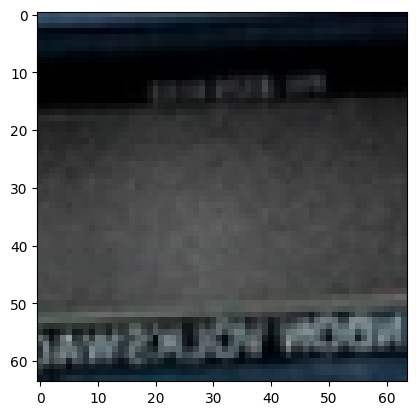

Истинный класс: Other, Предсказанный класс: Other


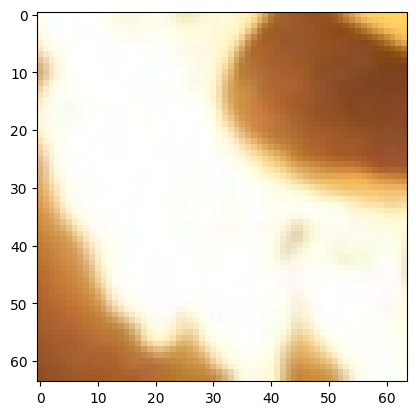

Истинный класс: Desk, Предсказанный класс: Building


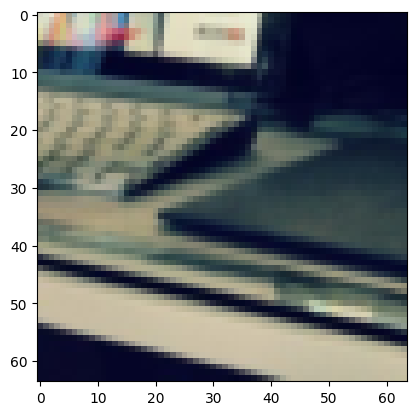

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 128
correct ---> 94
Истинный класс: Other, Предсказанный класс: Other


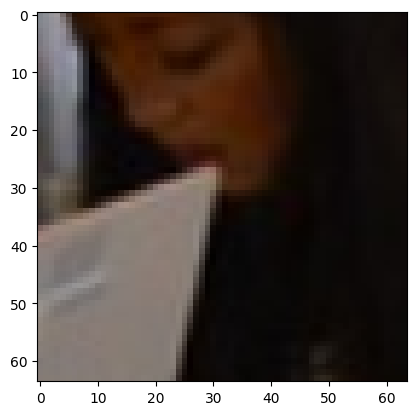

Истинный класс: Other, Предсказанный класс: Other


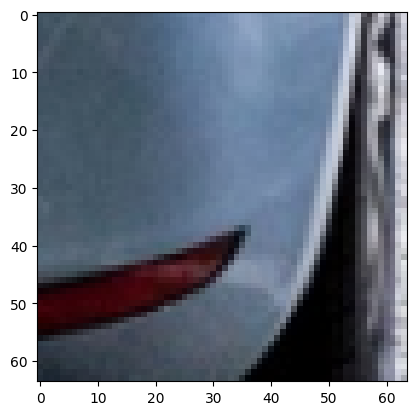

Истинный класс: Other, Предсказанный класс: Other


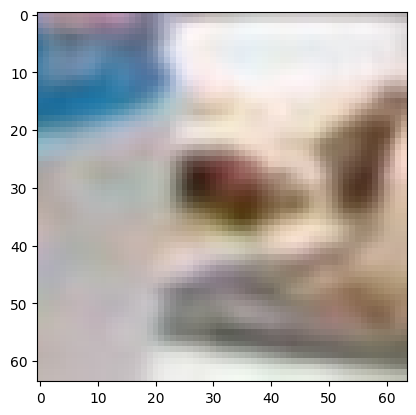

Истинный класс: Other, Предсказанный класс: Other


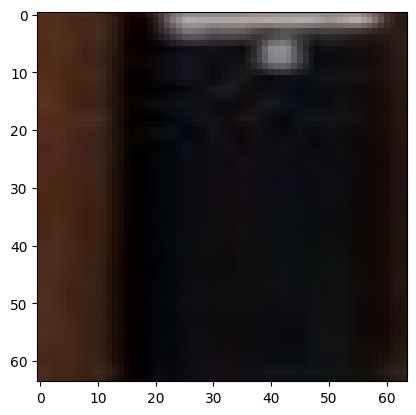

labels ---> tensor([0])
predicted ---> tensor([9])
total ---> 129
correct ---> 94
Истинный класс: Building, Предсказанный класс: Other


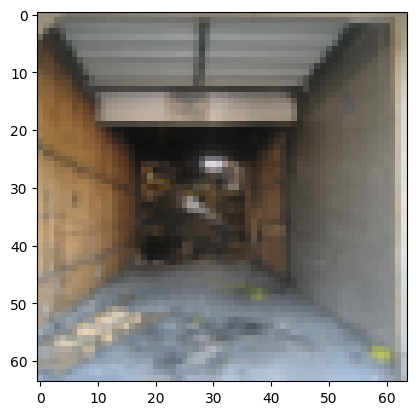

Точность на тестовых данных: 72.87%


In [112]:
# Обучение модели
num_epochs = 10

for epoch in range(num_epochs):  # количество эпох
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # print('loss ', epoch, ' -- ', running_loss)

    print('Обучение завершен  ======   ')

    # at end of epoch check validation loss and acc
    with torch.no_grad():
      	# switch model to eval (not train) model
        model.eval()
        correct = 0
        total = 0
        all_val_loss = []
        for images, labels in valLoader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            total += labels.size(0)
            # calculate predictions
            predicted = torch.argmax(outputs, dim=1)
            # calculate actual values
            correct += (predicted == labels).sum().item()
            # calculate the loss
            all_val_loss.append(loss_func(outputs, labels).item())
        # calculate val-loss
        mean_val_loss = sum(all_val_loss) / len(all_val_loss)
        # calculate val-accuracy
        mean_val_acc = 100 * (correct / total)

    print(
        'Epoch [{}/{}], Loss: {:.4f}, Val-loss: {:.4f}, Val-acc: {:.1f}%'.format(
            epoch+1, num_epochs, loss.item(), mean_val_loss, mean_val_acc
        )
    )

    print('Завершена валидация  ======   ')

# Оценка модели
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        print('labels --->', labels)
        _, predicted = torch.max(outputs.data, 1)
        print('predicted --->', predicted)
        total += labels.size(0)
        print('total --->', total)
        correct += (predicted == labels).sum().item()
        print('correct --->', correct)
        # Вывод изображений и предсказаний
        for i in range(len(images)):
            print(f'Истинный класс: {classes[labels[i]]}, Предсказанный класс: {classes[predicted[i]]}')
            imshow(images[i])

print(f'Точность на тестовых данных: {100 * correct / total:.2f}%')

# save to file
torch.save(model, 'cnn_houses.pt')
